In [ ]:
# classification

In [1]:
## data

from sklearn.datasets import make_circles

n_samples = 20000

X, y = make_circles(n_samples,noise=0.03)

In [2]:
X[:5]

array([[ 0.8139228 ,  0.13974787],
       [ 0.89665121, -0.45099051],
       [ 0.05558764, -0.80632151],
       [-0.14364588, -0.81196768],
       [-0.40526946,  0.87338028]])

In [3]:
X.shape,y.shape

((20000, 2), (20000,))

In [4]:
#EDA

import pandas as pd

circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "y":y})

In [5]:
circles

,X1,X2,y
0,0.813923,0.139748,1
1,0.896651,-0.450991,0
2,0.055588,-0.806322,1
3,-0.143646,-0.811968,1
4,-0.405269,0.873380,0
...,...,...,...
19995,-0.943769,0.149634,0
19996,1.001085,-0.126551,0
19997,-0.742185,-0.535345,0
19998,-0.151942,-0.801201,1


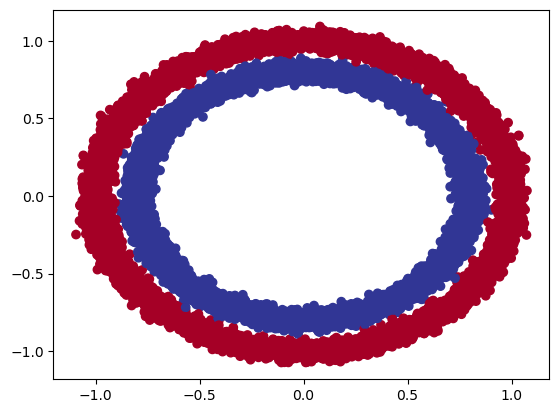

In [6]:
# vizualization

import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
## Toy dataset: A dataset small enough to experiment but sizeable enough to experiment.

In [8]:
import torch

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
X

tensor([[ 0.8139,  0.1397],
        [ 0.8967, -0.4510],
        [ 0.0556, -0.8063],
        ...,
        [-0.7422, -0.5353],
        [-0.1519, -0.8012],
        [-0.5816, -0.5646]])

In [11]:
y[:5]

tensor([1., 0., 1., 1., 0.])

In [12]:
## traninig test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([15000, 2]),
 torch.Size([5000, 2]),
 torch.Size([15000]),
 torch.Size([5000]))

In [13]:
## using SVM

from sklearn.svm import SVC
clf = SVC(gamma="auto")
clf.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, accuracy_score
y_pred_svc = clf.predict(X_test)
mean_absolute_error(y_pred_svc, y_test), accuracy_score(y_pred_svc, y_test)

(0.001, 0.999)

In [14]:
## using NN with torch

In [15]:
#1. selecting device
#2. building model
#3. define loss and optimizer
#4. create traning loop

In [16]:
#1. selecting device

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [17]:
#2. building model

from torch import nn

In [18]:


#method 1

# class CirclePred(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer_1 = nn.Linear(in_features=2, out_features=5)
        
#         self.layer_2 = nn.Linear(in_features=5, out_features=10)
#         self.layer_3 = nn.Linear(in_features=10, out_features=5)
#         self.layer_4 = nn.Linear(in_features=5, out_features=1)
    
#     def forward(self, x):
#         relu = nn.ReLU() # applying ReLU in intermidate layers
#         self.l1 = relu(self.layer_1(x))
#         self.l2 = relu(self.layer_2(self.l1))
#         self.l3 = relu(self.layer_3(self.l2))

#         self.f1 = self.layer_4(self.l3)
#         return self.f1
    
# model0 = CirclePred().to(device)
# print(model0)

In [19]:
## method 2 - using nn sequential

model0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=1),
)

model0.to(device)
model0

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [20]:
next(model0.parameters()).device

device(type='cuda', index=0)

In [21]:
model0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 7.0265e-01, -1.3783e-01],
                      [ 5.4201e-01,  4.5503e-01],
                      [-5.4677e-01,  4.3467e-01],
                      [-2.5122e-01, -1.4660e-01],
                      [-3.0927e-01, -3.3383e-01],
                      [-3.7560e-01, -1.5551e-01],
                      [-3.0211e-01, -3.6064e-01],
                      [-3.9544e-01,  4.4985e-01],
                      [ 6.6603e-01, -6.5957e-01],
                      [-5.1630e-01,  2.0379e-01],
                      [-9.0437e-02, -6.0967e-01],
                      [ 6.5842e-01,  6.7194e-01],
                      [-6.2669e-01, -2.7444e-01],
                      [-3.4160e-01, -5.5390e-01],
                      [-4.0980e-01, -4.1519e-01],
                      [-5.4558e-01, -5.3268e-01],
                      [ 4.9344e-01, -1.2457e-01],
                      [ 4.7363e-01, -8.2115e-02],
                      [ 7.0326e-01,  4.9085e-01],
                      [-

In [22]:
#3. define loss and optimizer

loss_fn = torch.nn.BCEWithLogitsLoss() # binary cross entropy loss, built in sigmoid
optimizer_fn = torch.optim.AdamW(params=model0.parameters(),lr=0.01)

In [23]:
loss_fn, optimizer_fn

(BCEWithLogitsLoss(),
 AdamW (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     weight_decay: 0.01
 ))

In [24]:
def acc_s(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [25]:
#4. create traning loop

EPOCH = 1000

epoch_c = []
train_loss_c = []
test_loss_c = []

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)
 
for e in range(EPOCH):
    model0.train() # setting to train
    
    #forward
    y_logits = model0(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits.squeeze())) # this is for loss_fn, 
    
    #calc loss
    get_loss = loss_fn(y_logits.squeeze(), y_train) #BCEWithLogitsLoss takes raw logits as inout and apply sigmod an round in it.
    
    acc = acc_s( y_train, y_pred)
    
    #optimze
    optimizer_fn.zero_grad()
    
    #backprop
    get_loss.backward()
    
    #step optimize, perform gradient decdent
    optimizer_fn.step()
    
    model0.eval() # turn off gradent
    
    if e%100 == 0:
        with torch.inference_mode():
            
            test_logits =  model0(X_test)
            test_preds = torch.round(torch.sigmoid(test_logits.squeeze()))
            test_loss = loss_fn(test_logits.squeeze(), y_test)
            
            test_acc = acc_s(y_test, test_preds)
            epoch_c.append(e)
            train_loss_c.append(get_loss.cpu().detach().numpy()) # detach to convert tensor to numpy
            test_loss_c.append(test_loss)
            print("Epoch:",e, "| train accuracy" ,acc, "| test accuracy", test_acc,
                  "| loss",get_loss.cpu().detach().numpy(), "| test loss", test_loss.cpu().detach().numpy())

Epoch: 0 | train accuracy 51.1 | test accuracy 51.35999999999999 | loss 0.6980222 | test loss 0.68809813
Epoch: 100 | train accuracy 99.95333333333333 | test accuracy 99.86 | loss 0.0765647 | test loss 0.076858915
Epoch: 200 | train accuracy 99.97333333333333 | test accuracy 99.88 | loss 0.020724334 | test loss 0.022406382
Epoch: 300 | train accuracy 99.97333333333333 | test accuracy 99.88 | loss 0.011242229 | test loss 0.01293534
Epoch: 400 | train accuracy 99.98 | test accuracy 99.9 | loss 0.0075912653 | test loss 0.009265256
Epoch: 500 | train accuracy 99.98 | test accuracy 99.88 | loss 0.005733822 | test loss 0.007384182
Epoch: 600 | train accuracy 99.98 | test accuracy 99.88 | loss 0.0046195975 | test loss 0.0062571545
Epoch: 700 | train accuracy 99.98 | test accuracy 99.88 | loss 0.0038841004 | test loss 0.005519856
Epoch: 800 | train accuracy 99.98 | test accuracy 99.88 | loss 0.0033630503 | test loss 0.005001464
Epoch: 900 | train accuracy 99.98 | test accuracy 99.88 | loss 0.0

In [ ]:
import requests
import os

file_url = "https://raw.githubusercontent.com/priyanshu-hawk/pytorch_random/main/helper_functions.py"
file_name = file_url.split("/")[-1]

if not os.path.exists(file_name):
    r = requests.get(file_url)
    print(r.status_code)
    with open(file_name, 'w') as f:
        f.write(r.content.decode())
else:
    print("File already present")

File already present


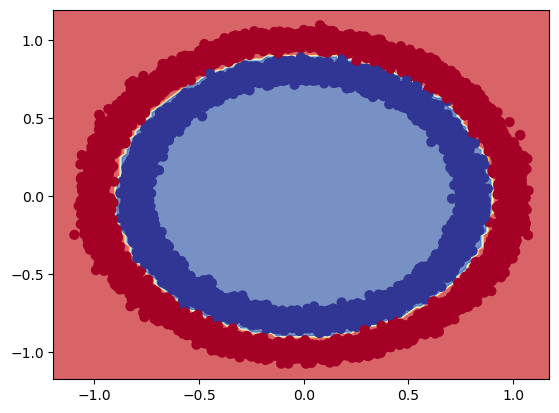

In [27]:
from helper_functions import plot_decision_boundary

plot_decision_boundary(model0, X_train, y_train)

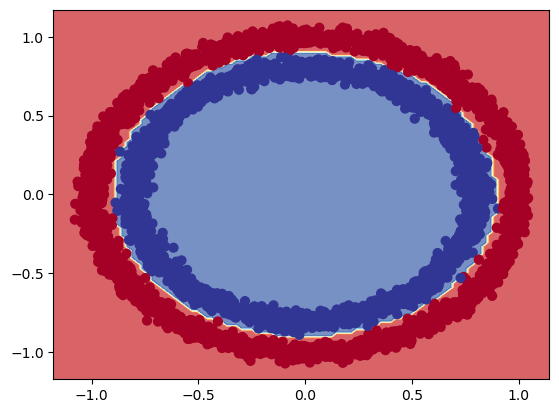

In [28]:
plot_decision_boundary(model0, X_test, y_test)

## model improvment

1. more layers
2. more hidden units
3. fit for long
4. change activation fn
5. chnage lr.

### already did above

In [35]:
# putting model0 to device

model0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [36]:
X_test.device

device(type='cuda', index=0)

In [37]:
next(model0.parameters()).device

device(type='cuda', index=0)

In [54]:
y_logits = model0(X_test) # raw logits
print(len(y_logits))
y_preds = torch.round(torch.sigmoid(y_logits.squeeze()))

5000


In [55]:
len(y_preds)

5000

In [56]:
y_preds

tensor([1., 1., 1.,  ..., 1., 1., 0.], device='cuda:0',
       grad_fn=<RoundBackward0>)

In [63]:
# y_preds.cpu().detach().numpy(), y_test.cpu().detach().numpy()

In [62]:
# chrecking accuracy
from sklearn.metrics import accuracy_score
# y_preds.cpu().detach().numpy()
accuracy_score(y_test.cpu().detach().numpy(), y_preds.cpu().detach().numpy())

0.999